# Tutorial 1
## Classifying Sleep States using 3 CNN models

Here we run a multiclass classification problem to identify anesthesia-induced brain states using 3 iterations of the CNN architecture described in the paper. The first is identical to the paper, the second is trained using my optimized mechanism, and the third has modified architecture and optimized training.

In [1]:
# Import system modules
import os
import gc
import sys
import glob
import importlib
from google.colab import drive

# Import computational modules
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Mount repository to Google Colab
colab = True
if colab == True:
  drive.mount('/content/MyDrive', force_remount=True)
  os.chdir('/content/MyDrive/MyDrive/Courses/NeuralNetworks/e4040-fall2025-project-lsls/')

Mounted at /content/MyDrive


## Data preprocessing

Begin by loading and plotting one example of each class/brain state from the raw data. Clean, normalize and separate into train/test TensorDataset format for model input.

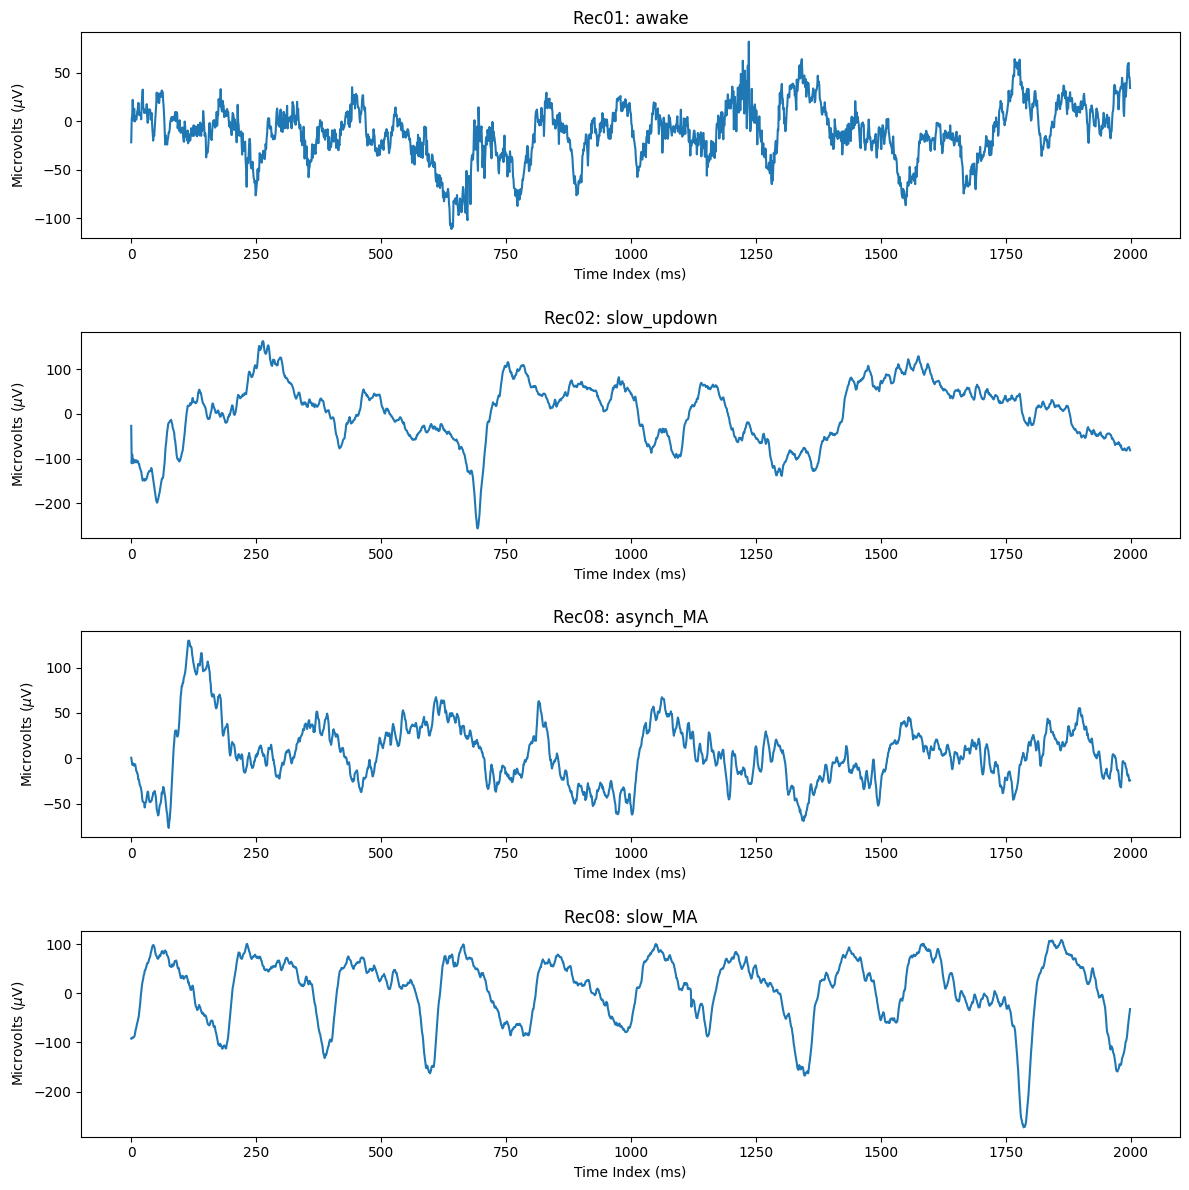

In [3]:
from utils import preprocess

# Load and plot time series data. Plotting may take a few minutes
data, metadata = preprocess.load_data()
preprocess.plot_timeseries_per_state(data, metadata)

In [4]:
# Prep for model/DataLoader
# If you are running this for the first time, please add the argument save_weights=True to the function preprocess.prep_data
full_dataset, train_dataset, test_dataset = preprocess.prep_data(data, metadata)


State encoding summary:
      State  Encoded  Count
      awake        0    968
slow_updown        1  24720
  asynch_MA        2   9596
    slow_MA        3   6444


# Training and evaluation

Train and evaluate three models. CNN() mirrors the paper's base architecture as a 1D CNN for time series with 3 convolutional blocks, ReLU, pooling, and a fully connected Classifier. A key distinction is that I opted not to use the dual-CNN structure, as I found I could achieve higher accuracy when directly classifying each microarousal state. This is reflected in the subsequent Confusion Matrices.

The second class, ModifiedCNN(), makes the following changes:

    (1) Global Average Pooling
    (2) A better receptive field with larger kernels
    (3) Batch Normalization
    (4) Smaller FC/Dense layers to reduce parameters
    (5) Dropout
    (6) Adaptive Pooling in the case of variable length time series data.

In [ ]:
from utils.single_cnn_models import CNN
from utils.train import train_single_default

In [5]:
# Load training/testing datasets for consistency

train_indices = torch.load("models/train_dataset_indices.pth")
train_dataset = torch.utils.data.Subset(full_dataset, train_indices)

test_indices = torch.load("models/test_dataset_indices.pth")
test_dataset = torch.utils.data.Subset(full_dataset, test_indices)

# Model 1

In [ ]:
# Train the first model. If the model has already been trained, skip to evaluation.

model_name_1 = "cnn_standard_default"
model_1 = train_single_default(
    dataset=train_dataset,
    model_name=model_name_1,
    model_class=CNN
)

Using device: cpu

Epoch 1/10 starting
Epoch [1/10] Train Loss: 0.1831 Acc: 94.45% | Val Loss: 0.0636 Acc: 98.11%

Epoch 2/10 starting
Epoch [2/10] Train Loss: 0.0630 Acc: 98.08% | Val Loss: 0.0291 Acc: 99.18%

Epoch 3/10 starting
Epoch [3/10] Train Loss: 0.0381 Acc: 98.93% | Val Loss: 0.0183 Acc: 99.49%

Epoch 4/10 starting
Epoch [4/10] Train Loss: 0.0252 Acc: 99.28% | Val Loss: 0.0127 Acc: 99.61%

Epoch 5/10 starting
Epoch [5/10] Train Loss: 0.0192 Acc: 99.38% | Val Loss: 0.0064 Acc: 99.85%
Saved model cnn_standard_default at epoch 5 as models/cnn_standard_default/model_cnn_standard_default_epoch5.pth

Epoch 6/10 starting
Epoch [6/10] Train Loss: 0.0160 Acc: 99.53% | Val Loss: 0.0106 Acc: 99.67%

Epoch 7/10 starting
Epoch [7/10] Train Loss: 0.0126 Acc: 99.66% | Val Loss: 0.0221 Acc: 99.28%

Epoch 8/10 starting
Epoch [8/10] Train Loss: 0.0130 Acc: 99.65% | Val Loss: 0.0167 Acc: 99.51%

Epoch 9/10 starting
Epoch [9/10] Train Loss: 0.0075 Acc: 99.79% | Val Loss: 0.0130 Acc: 99.57%

Epoc

In [ ]:
from utils.eval import evaluate_single_cnn

[cnn_standard_default_0.9] Unknown count: 62
Saved unknown classifcations to models/cnn_standard_default_0.9/unknown_df_cnn_standard_default_0.9.pkl
Saved all predictions to models/cnn_standard_default_0.9/all_preds_df_cnn_standard_default_0.9.pkl


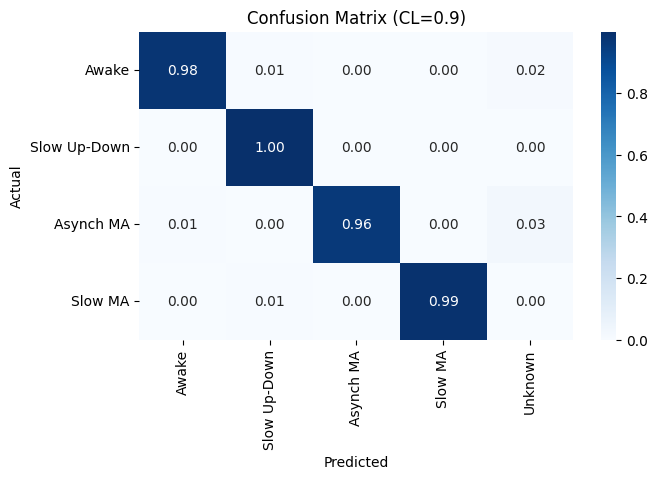

Saved metrics to models/cnn_standard_default_0.9/metrics_df_cnn_standard_default_0.9.pkl


In [ ]:
# Import saved model
model_name_1 = "cnn_standard_default"
f_model_1 = f"models/{model_name_1}_training/model_{model_name_1}_epoch10.pth"
model_1=CNN()
state_dict_1 = torch.load(f_model_1, map_location="cpu")
model_1.load_state_dict(state_dict_1)

# Generate and save precision, recall and f1 dfs
threshold = 0.9
save_model_name = model_name_1 + f"_{threshold}"
cm, unknown_df, metrics = evaluate_single_cnn(
    model=model_1,
    model_name=save_model_name,
    test_dataset=test_dataset,
    threshold=threshold
)

# Model 2

In [ ]:
# Train the second model. If the model has already been trained, skip to evaluation.

model_name_2 = "cnn_standard_optimized"
model_2 = train_single_default(
    dataset=train_dataset,
    model_name=model_name_2,
    model_class=CNN
)

Using device: cpu

Epoch 1/10 starting
Epoch [1/10] Train Loss: 0.1673 Acc: 94.84% | Val Loss: 0.0699 Acc: 97.98%

Epoch 2/10 starting
Epoch [2/10] Train Loss: 0.0635 Acc: 98.00% | Val Loss: 0.0440 Acc: 98.70%

Epoch 3/10 starting
Epoch [3/10] Train Loss: 0.0371 Acc: 98.91% | Val Loss: 0.0882 Acc: 97.23%

Epoch 4/10 starting
Epoch [4/10] Train Loss: 0.0253 Acc: 99.24% | Val Loss: 0.0517 Acc: 98.89%

Epoch 5/10 starting
Epoch [5/10] Train Loss: 0.0170 Acc: 99.46% | Val Loss: 0.0320 Acc: 99.21%
Saved model cnn_standard_optimized at epoch 5 as models/cnn_standard_optimized/model_cnn_standard_optimized_epoch5.pth

Epoch 6/10 starting
Epoch [6/10] Train Loss: 0.0156 Acc: 99.52% | Val Loss: 0.0179 Acc: 99.55%

Epoch 7/10 starting
Epoch [7/10] Train Loss: 0.0145 Acc: 99.63% | Val Loss: 0.0170 Acc: 99.64%

Epoch 8/10 starting
Epoch [8/10] Train Loss: 0.0096 Acc: 99.72% | Val Loss: 0.0200 Acc: 99.64%

Epoch 9/10 starting
Epoch [9/10] Train Loss: 0.0101 Acc: 99.73% | Val Loss: 0.0215 Acc: 99.69%

[cnn_standard_optimized_0.9] Unknown count: 34
Saved unknown classifcations to models/cnn_standard_optimized_0.9/unknown_df_cnn_standard_optimized_0.9.pkl
Saved all predictions to models/cnn_standard_optimized_0.9/all_preds_df_cnn_standard_optimized_0.9.pkl


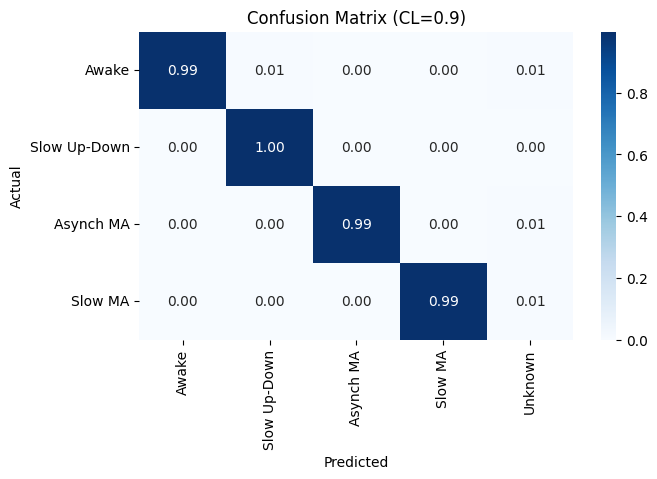

Saved metrics to models/cnn_standard_optimized_0.9/metrics_df_cnn_standard_optimized_0.9.pkl


In [ ]:
# Import saved model
model_name_2 = "cnn_standard_optimized"
f_model_2 = f"models/{model_name_2}_training/model_{model_name_2}_epoch10.pth"
model_2=CNN()
state_dict_2 = torch.load(f_model_2, map_location="cpu")
model_2.load_state_dict(state_dict_2)

# Iterate through thresholds to generate and save precision, recall and f1 dfs
threshold = 0.9
save_model_name = model_name_2 + f"_{threshold}"
cm, unknown_df, metrics = evaluate_single_cnn(
    model=model_2,
    model_name=save_model_name,
    test_dataset=test_dataset,
    threshold=threshold
)

# Model 3

In [ ]:
from utils.single_cnn_models import ModifiedCNN

In [ ]:
# Train the third model. If the model has already been trained, skip to evaluation.

model_name_3 = "cnn_modified_optimized"
model_3 = train_single_default(
    dataset=train_dataset,
    model_name=model_name_3,
    model_class=ModifiedCNN
)

Using device: cpu

Epoch 1/10 starting
Epoch [1/10] Train Loss: 0.1560 Acc: 95.36% | Val Loss: 0.0733 Acc: 97.93%

Epoch 2/10 starting
Epoch [2/10] Train Loss: 0.0852 Acc: 97.44% | Val Loss: 0.0659 Acc: 97.90%

Epoch 3/10 starting
Epoch [3/10] Train Loss: 0.0724 Acc: 97.78% | Val Loss: 0.0552 Acc: 98.11%

Epoch 4/10 starting
Epoch [4/10] Train Loss: 0.0692 Acc: 97.84% | Val Loss: 0.0558 Acc: 97.96%

Epoch 5/10 starting
Epoch [5/10] Train Loss: 0.0614 Acc: 97.98% | Val Loss: 0.0555 Acc: 98.10%
Saved model cnn_modified_optimized at epoch 5 as models/cnn_modified_optimized/model_cnn_modified_optimized_epoch5.pth

Epoch 6/10 starting
Epoch [6/10] Train Loss: 0.0608 Acc: 97.97% | Val Loss: 0.0502 Acc: 98.37%

Epoch 7/10 starting
Epoch [7/10] Train Loss: 0.0613 Acc: 97.95% | Val Loss: 0.0553 Acc: 98.10%

Epoch 8/10 starting
Epoch [8/10] Train Loss: 0.0573 Acc: 98.11% | Val Loss: 0.0451 Acc: 98.40%

Epoch 9/10 starting
Epoch [9/10] Train Loss: 0.0557 Acc: 98.15% | Val Loss: 0.0439 Acc: 98.44%

## Threshold testing

Since the third model demonstrated the highest underclassification, iterate through confidence thresholds to see the effect on precision, recall and f-1 score

[cnn_modified_optimized_0.5] Unknown count: 10
Saved unknown classifcations to models/cnn_modified_optimized_0.5/unknown_df_cnn_modified_optimized_0.5.pkl
Saved all predictions to models/cnn_modified_optimized_0.5/all_preds_df_cnn_modified_optimized_0.5.pkl


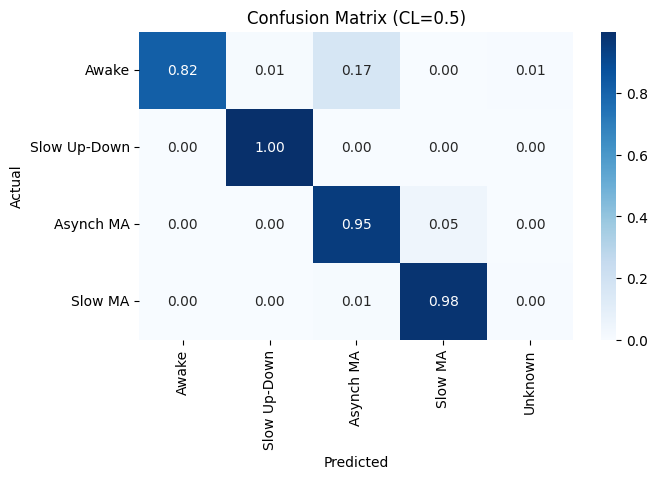

Saved metrics to models/cnn_modified_optimized_0.5/metrics_df_cnn_modified_optimized_0.5.pkl
[cnn_modified_optimized_0.6] Unknown count: 73
Saved unknown classifcations to models/cnn_modified_optimized_0.6/unknown_df_cnn_modified_optimized_0.6.pkl
Saved all predictions to models/cnn_modified_optimized_0.6/all_preds_df_cnn_modified_optimized_0.6.pkl


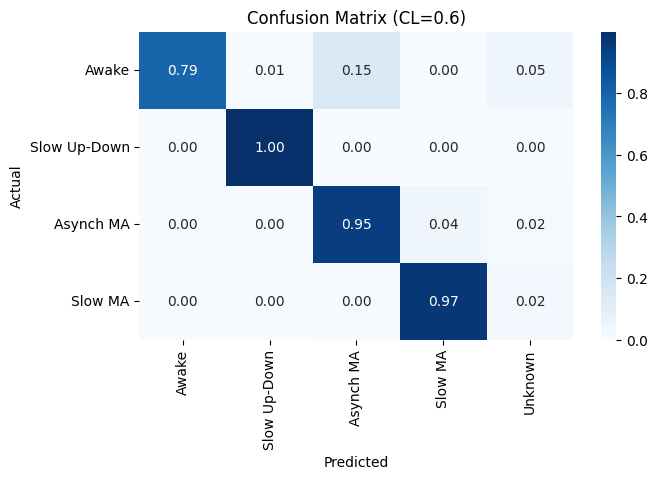

Saved metrics to models/cnn_modified_optimized_0.6/metrics_df_cnn_modified_optimized_0.6.pkl
[cnn_modified_optimized_0.7] Unknown count: 137
Saved unknown classifcations to models/cnn_modified_optimized_0.7/unknown_df_cnn_modified_optimized_0.7.pkl
Saved all predictions to models/cnn_modified_optimized_0.7/all_preds_df_cnn_modified_optimized_0.7.pkl


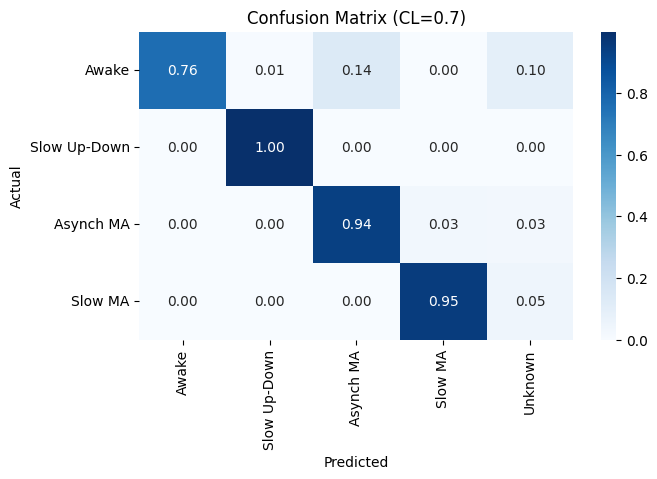

Saved metrics to models/cnn_modified_optimized_0.7/metrics_df_cnn_modified_optimized_0.7.pkl
[cnn_modified_optimized_0.8] Unknown count: 274
Saved unknown classifcations to models/cnn_modified_optimized_0.8/unknown_df_cnn_modified_optimized_0.8.pkl
Saved all predictions to models/cnn_modified_optimized_0.8/all_preds_df_cnn_modified_optimized_0.8.pkl


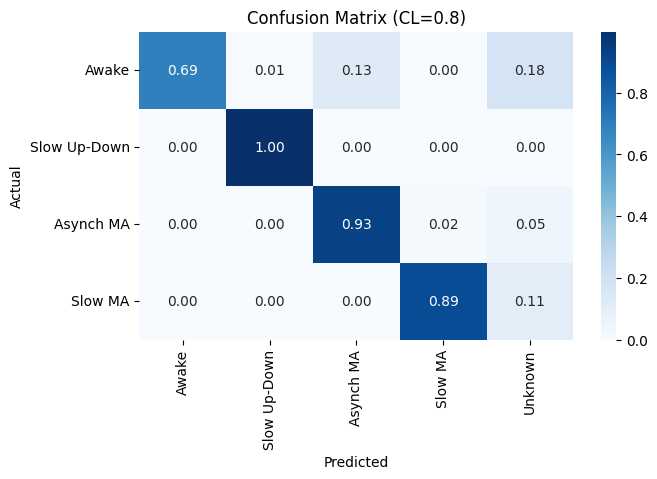

Saved metrics to models/cnn_modified_optimized_0.8/metrics_df_cnn_modified_optimized_0.8.pkl
[cnn_modified_optimized_0.9] Unknown count: 512
Saved unknown classifcations to models/cnn_modified_optimized_0.9/unknown_df_cnn_modified_optimized_0.9.pkl
Saved all predictions to models/cnn_modified_optimized_0.9/all_preds_df_cnn_modified_optimized_0.9.pkl


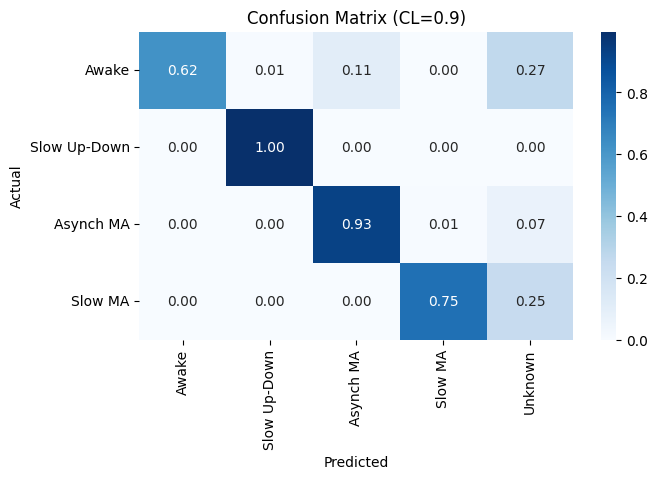

Saved metrics to models/cnn_modified_optimized_0.9/metrics_df_cnn_modified_optimized_0.9.pkl


In [ ]:
# Import saved model
model_name_3 = "cnn_modified_optimized"
f_model_3 = f"models/{model_name_3}_training/model_{model_name_3}_epoch10.pth"
model_3=ModifiedCNN()
state_dict_3 = torch.load(f_model_3, map_location="cpu")
model_3.load_state_dict(state_dict_3)

# Iterate through thresholds to generate and save precision, recall and f1 dfs
threshold_list = [0.5, 0.6, 0.7, 0.8, 0.9]
for threshold in threshold_list:
  save_model_name = model_name_3 + f"_{threshold}"
  cm, unknown_df, metrics = evaluate_single_cnn(
      model=model_3,
      model_name=save_model_name,
      test_dataset=test_dataset,
      threshold=threshold
  )

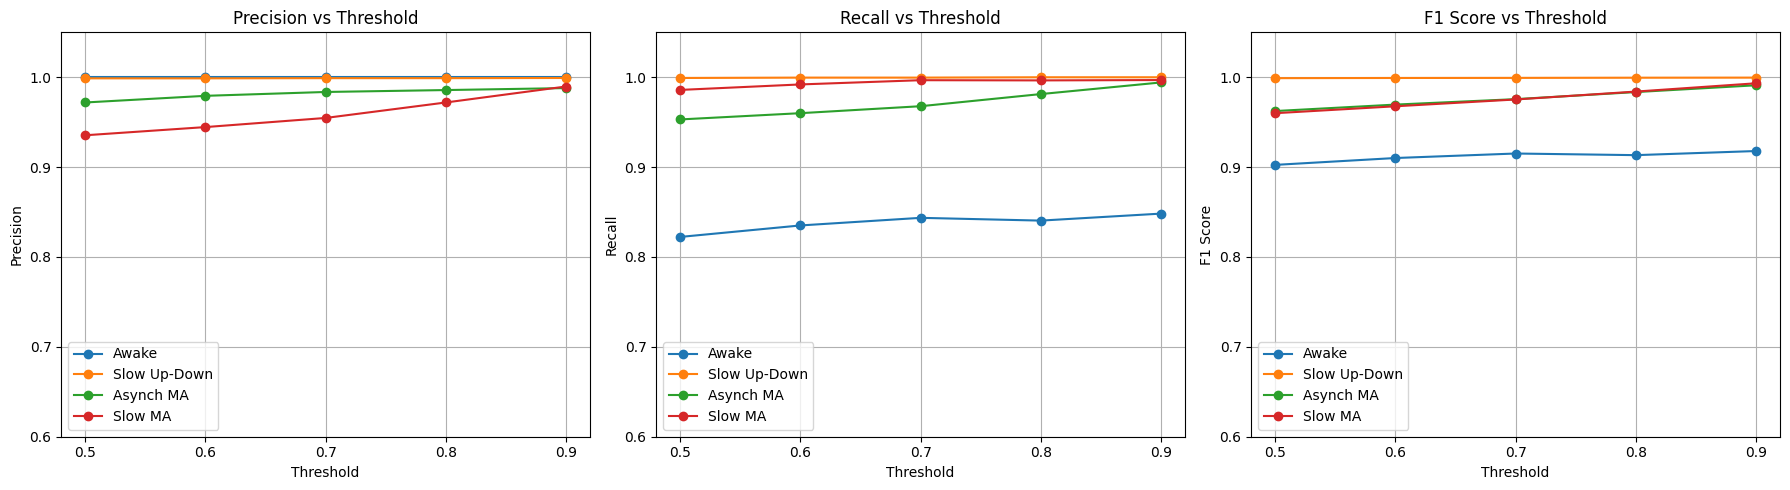

In [ ]:
# Plot precision, recall and f1 score
from utils.eval import summarize_metrics

summarize_metrics(model_name_3, threshold_list)

In [7]:
# Calculate percentages of unknowns for each model

from utils.eval import get_unknown_percentages

threshold = 0.9
models = ["cnn_standard_default", "cnn_standard_optimized", "cnn_modified_optimized"]
model_list = [model + f"_{threshold}" for model in models]
result_df = get_unknown_percentages(model_list, test_indices, metadata)
result_df

,cnn_standard_default_0.9,cnn_standard_optimized_0.9,cnn_modified_optimized_0.9
0,1.515152,0.505051,26.767677
1,0.019976,0.259688,0.339592
2,2.909483,0.646552,6.627155
3,0.311284,0.622568,24.824903
